IMPORTING LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


READING THE DATA (FROM YEAR 2014 TO 2018) INTO PANDAS DATAFRAME 

In [3]:
df = pd.read_excel("C:/Users/User/Downloads/Sales & Qty Sold Daily Data.xlsx")
df

,BRANCH_CODE,Date - Year,Date - Month,Date - Day,Total Ret Sales,Qty Sold Retoff
0,ALM,2018,April,27,5690.47,4.0
1,ALM,2018,April,29,1333.33,2.0
2,ALM,2018,April,30,666.66,2.0
3,ALM,2018,May,1,809.52,1.0
4,ALM,2018,May,6,14952.39,6.0
...,...,...,...,...,...,...
10348,SOFITL,2018,December,24,3075.24,1.0
10349,SOFITL,2018,December,25,4207.62,2.0
10350,SOFITL,2018,December,27,95.24,1.0
10351,SOFITL,2018,December,29,5046.67,2.0


AS WE HAVE THE DATE IN SEPARATE COLUMNS WE NEED TO MERGE IT 

In [4]:
df1=df[["Date - Year","Date - Month","Date - Day","BRANCH_CODE","Total Ret Sales","Qty Sold Retoff"]]

 NOW WE SELECT OUR DATE AND SALES

In [7]:
df1["Total Ret Sales"]=df1["Qty Sold Retoff"].astype(float)
df1["Sales"]=df1["Total Ret Sales"]
df1['Date']=pd.to_datetime(df1['Date - Month']+df1['Date - Year'].astype(str)+df1['Date - Day'].astype(str),format='%B%Y%d')
#df1['Date']=pd.to_datetime(df1['Date - Month']+df1['Date - Year'].astype(str)+df1['Date - Year'].astype(str),format='%B%Y%d')
df1=df1[["Date","Sales"]]

GROUPING THE DATE TO MONTHLY 

In [10]:
#df3=df1.groupby("Date").sum()
df3=df1
df3

,Date,Sales
0,2018-04-27,4.0
1,2018-04-29,2.0
2,2018-04-30,2.0
3,2018-05-01,1.0
4,2018-05-06,6.0
...,...,...
10348,2018-12-24,1.0
10349,2018-12-25,2.0
10350,2018-12-27,1.0
10351,2018-12-29,2.0


CHECKING WHETHER IT IS STATIONARY OR NOT 

In [11]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df3['Sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('p-value: %s' % result[1])

ADF Statistic: -6.750793
p-value: 0.000000
p-value: 2.9546986831455582e-09


CHECKING THE STATIONARY BY DIFFRENCING 

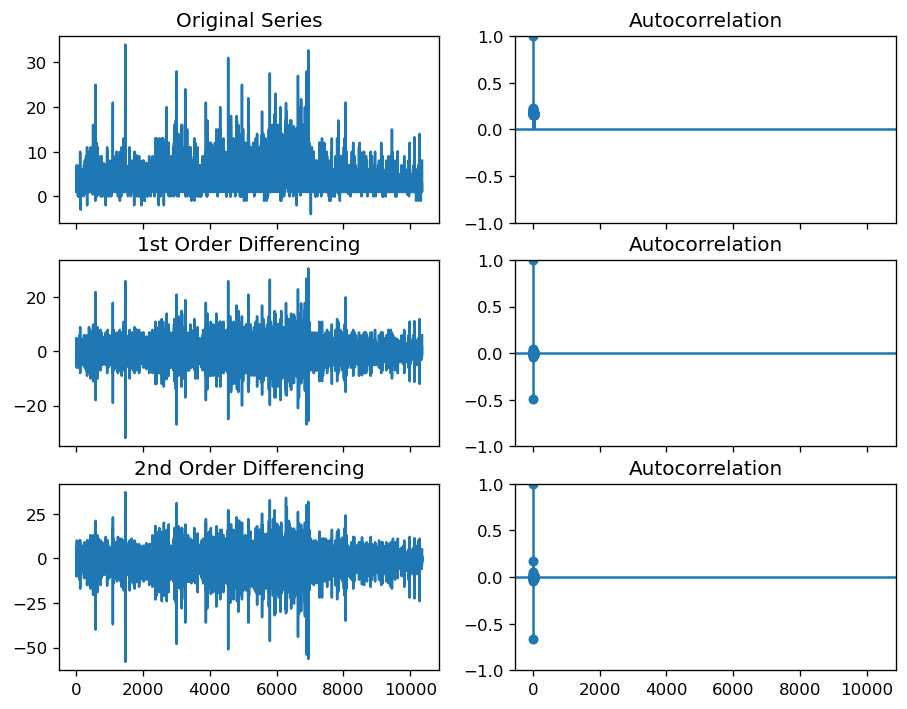

In [12]:
#import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df3['Sales']); axes[0, 0].set_title('Original Series')
plot_acf(df3['Sales'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df3['Sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df3['Sales'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df3['Sales'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df3['Sales'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()



CHECKING THE SATIONARTY WITH ADFLLER AND KPSS TEST

In [13]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df3['Sales'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('p-value: %s' % result[1])

ADF Statistic: -26.211294
p-value: 0.000000
p-value: 0.0


In [14]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test((df3['Sales'].diff().dropna()))

KPSS Statistic: 0.016201888740767768
p-value: 0.1
num lags: 141
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\stattools.py:2015: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [15]:
ts=df1[["Date","Sales"]]

In [23]:
ts.tail(115)

,Date,Sales
10238,2018-01-02,2.0
10239,2018-01-03,2.0
10240,2018-01-11,4.0
10241,2018-01-12,-1.0
10242,2018-01-14,4.0
...,...,...
10348,2018-12-24,1.0
10349,2018-12-25,2.0
10350,2018-12-27,1.0
10351,2018-12-29,2.0


SPLITING THE DATA SET INTO TRAIN AND TEST (TEST DATA CONTAIN DATA FROM 2014 TO 2017),(TRAIN DATA CONTAINS THE DATA OD YEAR2018)

In [24]:
ts=ts.groupby("Date").sum()
train=ts[:115]
test=ts[115:]
test=test[["Sales"]]
train=train[["Sales"]]

CHECKING THE p AND q VALUES

In [25]:
import itertools

p=range(0,8)
q=range(0,8)
d=(1,1)

pdq_com=list(itertools.product(p,d,q))

rmse=[]
order1=[]

for pdq in pdq_com:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)

    except:
        continue

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so in

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so in

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so in

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, 

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, 

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, 

SORTING THE VALUE BY RMSE 

In [26]:
results=pd.DataFrame(index=order1,data=rmse,columns=["RMSE"])
results.sort_values(by='RMSE')

,RMSE
"(0, 1, 0)",8.556883
"(0, 1, 0)",8.556883
"(1, 1, 0)",8.655227
"(1, 1, 0)",8.655227
"(2, 1, 0)",9.318203
...,...
"(0, 1, 2)",10.644673
"(5, 1, 6)",10.644727
"(5, 1, 6)",10.644727
"(0, 1, 1)",10.736775


TAKING THE P,D,Q VALUES THAT HAVE LESS RMSE TO FIT THE MODEL 

In [27]:
model=ARIMA(train,order=(0,1,0)).fit()

C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\ml1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


PREDICTING THE MODEL TO THE TEST DATA PERIOD (YEAR 2018)

In [28]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [29]:
pred1=model.predict(start=1,end=(len(ts)-1))

In [30]:
error=np.sqrt(mean_squared_error(test,pred))
error

8.556882895425854

In [31]:
test.mean(), np.sqrt(test.var())

(Sales    19.157043
 dtype: float64,
 Sales    8.51775
 dtype: float64)

PLOTING THE SALES AND PREDICTED SALES

<AxesSubplot:>

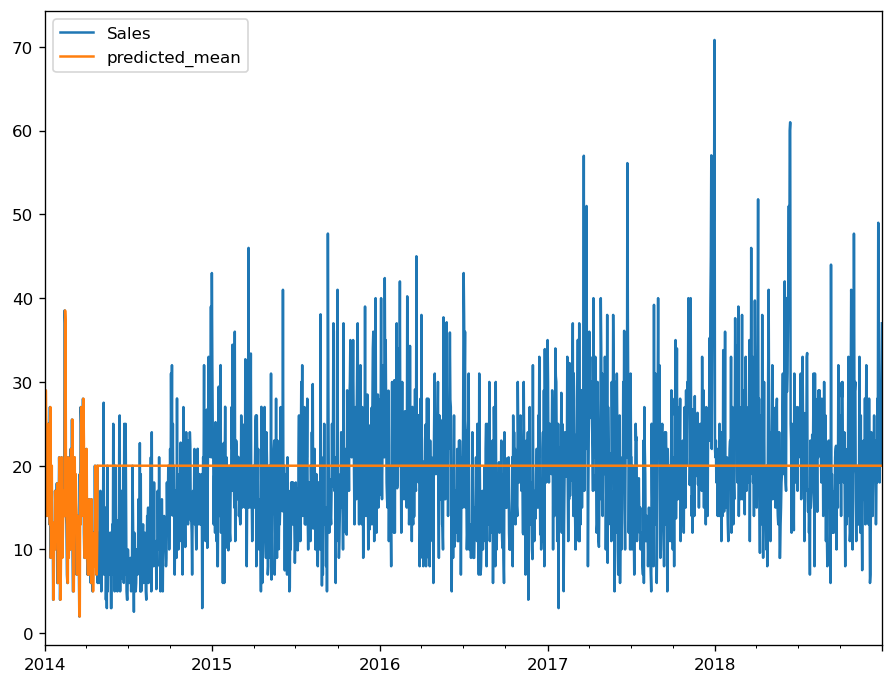

In [32]:
ts_sales=ts["Sales"]
final=pd.concat([ts_sales,pred1],axis=1)
final.plot()

In [27]:
final

,Sales,predicted_mean
2014-01-01,473.10,NaN
2014-02-01,426.25,472.334410
2014-03-01,457.54,437.910287
2014-04-01,326.91,442.031380
2014-05-01,345.52,356.056874
2014-06-01,355.01,317.105419
2014-07-01,292.60,348.289229
2014-08-01,340.00,351.971862
2014-09-01,353.18,353.303263
2014-10-01,517.91,361.192309
